In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
#data=data.drop("bmi",axis=1)
#dataset


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [1]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x = data['sex']
data['sex'] = le.fit_transform(x)
data.head()

y = data['smoker']
data['smoker'] = le.fit_transform(y)
data.head()

NameError: name 'data' is not defined

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [7]:
data.describe()

,age,sex,bmi,children,smoker,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000


In [8]:
data.corr()

C:\Users\raksh\AppData\Local\Temp\ipykernel_11020\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,sex,bmi,children,smoker,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000


In [9]:
x=pd.get_dummies(data["region"])
data=pd.concat([data,x],axis=1)
data=data.drop("region",axis=1)
data

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1


<Axes: >

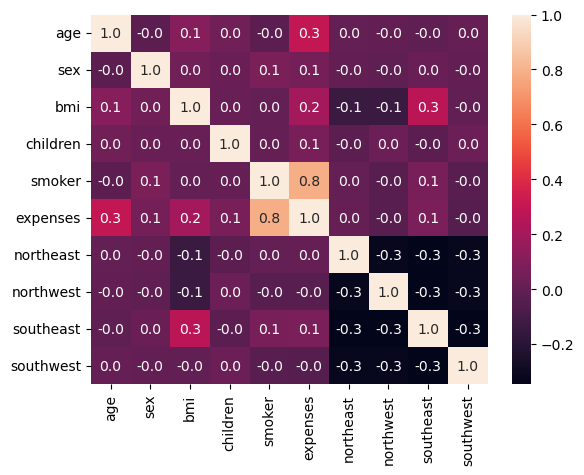

In [10]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

<Axes: xlabel='sex', ylabel='count'>

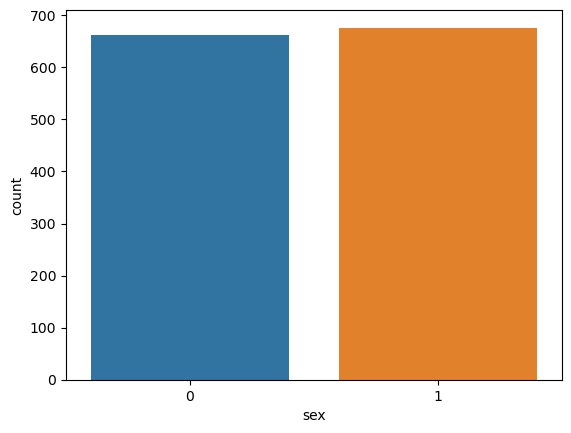

In [11]:
sns.countplot(data=data,x="sex")

<Axes: xlabel='children', ylabel='count'>

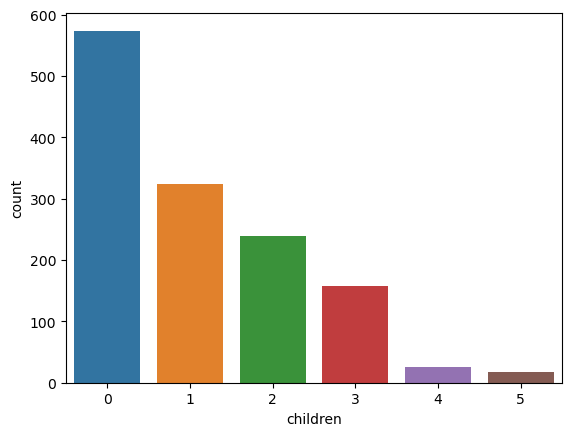

In [12]:
sns.countplot(data=data,x="children")

<Axes: xlabel='smoker', ylabel='count'>

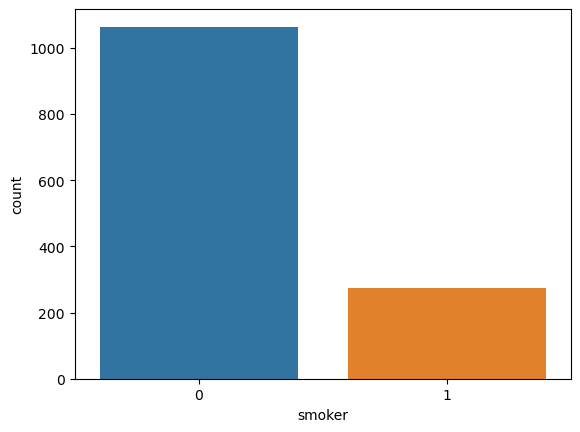

In [13]:
sns.countplot(data=data,x="smoker")

<Axes: xlabel='sex', ylabel='expenses'>

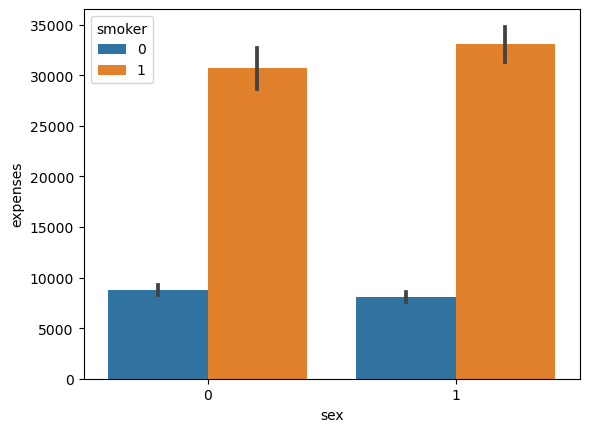

In [14]:
sns.barplot(data=data,x="sex",y="expenses",hue="smoker")

<Axes: xlabel='sex', ylabel='children'>

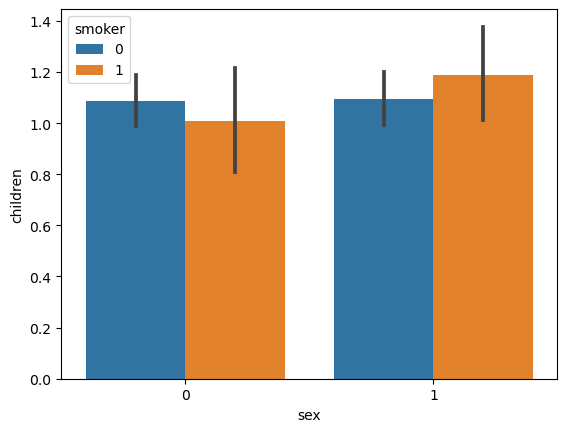

In [15]:
sns.barplot(data=data,x="sex",y="children",hue="smoker")

<Axes: xlabel='sex', ylabel='expenses'>

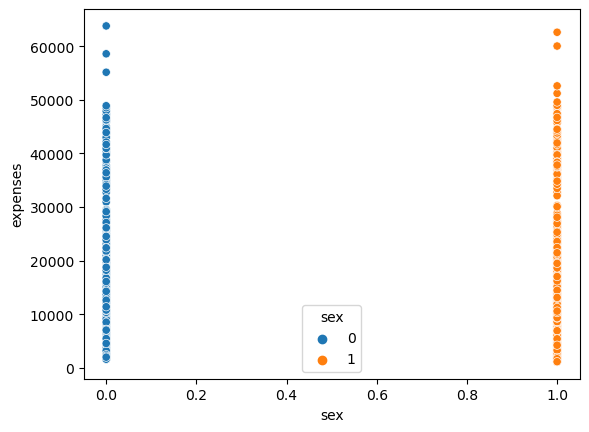

In [16]:
sns.scatterplot(data=data,x="sex",y="expenses",hue="sex")

In [17]:
data.shape

(1338, 10)

<Axes: ylabel='sex'>

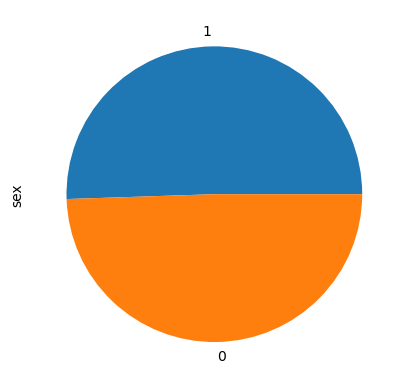

In [18]:
df=data["sex"].value_counts()
df.plot(kind='pie')

In [19]:
#label encode
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [20]:
data["sex"]=LE.fit_transform(data["sex"])
data["smoker"]=LE.fit_transform(data["smoker"])

In [21]:
data.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [22]:
x=data.drop("expenses",axis=1)
x
y=data.expenses

In [23]:
#x=data.drop("bmi",axis=1)
#x
#y=data.bmi

In [24]:
x.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0


In [25]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [26]:
 from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1070, 9), (268, 9), (1070,), (268,))

In [27]:
ytrain.head()

1204    18223.45
829      6117.49
1077     2102.26
416      9140.95
1295     1964.78
Name: expenses, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [29]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [30]:
ypred=lr.predict(xtest)
ypred[:5]


array([13305.67455264,  9983.61120982, 11682.24373697, 18032.37551645,
        4740.7997512 ])

In [31]:
ytest[:5]

698     10976.25
520     25656.58
1144     9630.40
908     15170.07
559      1646.43
Name: expenses, dtype: float64

In [32]:
lr.score(xtest,ytest)

0.7959358662345164

In [33]:
import numpy as np
df = [56,1,33.7,0,0,1,0,0,0.2]
df = np.array(df).reshape(1,-1)
lr.predict(df)

C:\Users\raksh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13362.15710479])

In [34]:
lr.score(xtest,ytest)

0.7959358662345164

In [35]:
import pickle as pkl
filename = "save_model.sav"
pkl.dump(lr, open(filename, 'wb'))

In [36]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pickle as pkl
filename="data.sav"
pkl.dump(lr,open(filename,'bw'))

In [38]:
loaded_model=pkl.load(open(filename,'br'))
loaded_model

LinearRegression()

In [39]:
import gradio as gr

In [40]:
def expense(age, sex,bmi , children, smoker, region_northwest,
region_southeast,region_southwest,region_northeast):
        x = np.array([age, sex,bmi , children, smoker,
region_northwest, region_southeast, region_southwest,region_northeast])
        x = np.array(x).reshape(1,-1)
 #df = sc.transform(df)
        prediction = lr.predict(x)
        prediction = float(prediction)
        return prediction

In [41]:
app = gr.Interface(fn=expense,
            inputs=[gr.inputs.Number(label="age"),

gr.inputs.Radio(choices=[1,0],optional=bool,label="sex"),
                    gr.inputs.Number(label="BMI"),
                    gr.inputs.Number(label="Children"),

gr.inputs.Radio(choices=[1,0],optional=bool,label="Smoker"),

gr.inputs.Radio(choices=[1,0],optional=bool,label="North_west"),

gr.inputs.Radio(choices=[1,0],optional=bool,label="South_east"),

gr.inputs.Radio(choices=[1,0],optional=bool,label="South_west"),
                    
gr.inputs.Radio(choices=[1,0],optional=bool,label="North_east"),                    
 ],
            outputs= "label",
            title="Developing an ML Model for Expenses prediction"
 )


C:\Users\raksh\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\raksh\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\raksh\anaconda3\lib\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


In [45]:
app.launch(show_error=True)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [43]:
app.close()

Closing server running on port: 7861


In [44]:
filename = "save_model.sav"
pkl.dump(lr, open(filename, 'wb'))